# Race predictions | K-Nearest Neighbors model

### Description

**In this notebook, it will be described the process of creating a horse winner race predictor based on the Kentucky derby winners data.**

### Targets:

* Perform an Exploratory Data Analysis.
* Transform and Standardize the data.
* Create a K-Nearest Neighbors model.
* Find the best fit for the model.
* Perform the metrics regard to the fastest horses.

## 1. Library importation

In [1]:
# Data management
import numpy as np
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')

# Data scaling
from sklearn.preprocessing import StandardScaler as SS

# Data splitting
from sklearn.model_selection import train_test_split as tts

# K-Nearest Neighbor model builder
from sklearn.neighbors import KNeighborsClassifier as KNC

# Model metrics
from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import classification_report as cr
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

## 2. Load and Information of the data

In [2]:
df = pd.read_csv('kentucky_derby_winners.csv')

### Data fields
* year : race year
* winner: the winning horse
* jockey: the winning jockey
* trainer: trainer of the winning horse
* owner: owner of the winning horse
* distance: distance of the race in miles
* track_condition: track conditions
* time_string: winning time in the format of Minutes:Seconds
* time_sec: winning time in seconds

In [3]:
df.head()

,year,winner,jockey,trainer,owner,distance,track_condition,time_string,time_sec
0,2022,Rich Strike,Sonny Leon,Eric Reed,RED TR-Racing,1.25,Fast,2:02.61,122.61
1,2021,Mandaloun,Florent Geroux,Brad H. Cox,Juddmonte Farm,1.25,Fast,2:01.02,121.02
2,2020,Authentic,John Velazquez,Bob Baffert,"Spendthrift Farm LLC, MyRaceHorse Stable, Mada...",1.25,Fast,2:00.61,120.61
3,2019,Country House,Flavien Prat,Bill Mott,"Mrs. J.V. Shields Jr., E. J. M. McFadden Jr. a...",1.25,Sloppy,2:03.93,123.93
4,2018,Justify,Mike E. Smith,Bob Baffert,"China Horse Club, Head of Plains Partners, Sta...",1.25,Sloppy,2:04.20,124.20


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   year             148 non-null    int64  
 1   winner           148 non-null    object 
 2   jockey           148 non-null    object 
 3   trainer          148 non-null    object 
 4   owner            148 non-null    object 
 5   distance         148 non-null    float64
 6   track_condition  148 non-null    object 
 7   time_string      148 non-null    object 
 8   time_sec         148 non-null    float64
dtypes: float64(2), int64(1), object(6)
memory usage: 10.5+ KB


In [5]:
df.describe()

,year,distance,time_sec
count,148.000000,148.000000,148.000000
mean,1948.500000,1.285473,129.178514
std,42.868014,0.087531,12.804196
min,1875.000000,1.250000,119.400000
25%,1911.750000,1.250000,122.200000
50%,1948.500000,1.250000,124.000000
75%,1985.250000,1.250000,128.275000
max,2022.000000,1.500000,172.250000


## 3. Exploratory Data Analysis

### 3.1 Missing data

[Text(0.5, 1.0, 'Existent data (purple) and missing data (yellow) ratio')]

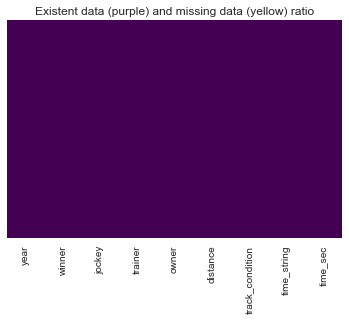

In [6]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis').set(title = 'Existent data (purple) and missing data (yellow) ratio')

### 3.2 Considering just one time column

In [7]:
df.drop('time_string', axis=1, inplace=True)
df.head(1)

,year,winner,jockey,trainer,owner,distance,track_condition,time_sec
0,2022,Rich Strike,Sonny Leon,Eric Reed,RED TR-Racing,1.25,Fast,122.61


### 3.3 Features of the distance of the races

[Text(0.5, 1.0, 'Number of races per race distance')]

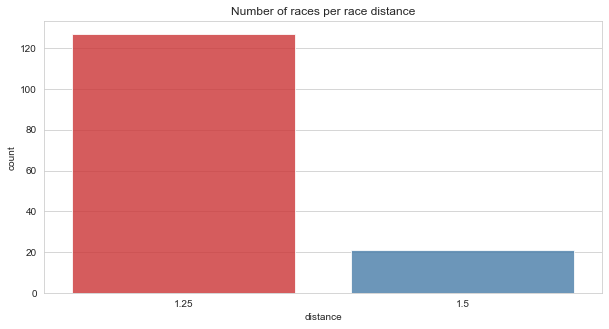

In [8]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='distance', palette='Set1', alpha=0.8).set(title = 'Number of races per race distance')

[Text(0.5, 1.0, 'Distance of the races through the years')]

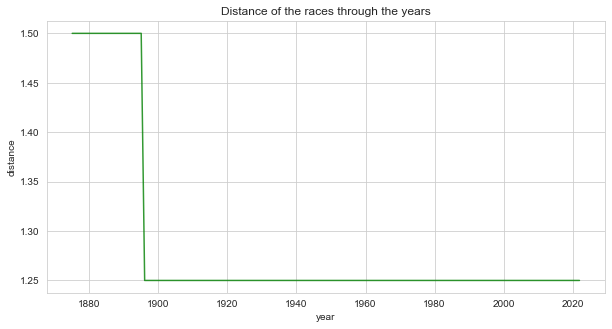

In [9]:
plt.figure(figsize=(10,5))
sns.lineplot(data=df, x='year', y='distance', color='green', alpha=0.8).set(title = 'Distance of the races through the years')

[Text(0.5, 1.0, 'Wining time of the races through the years')]

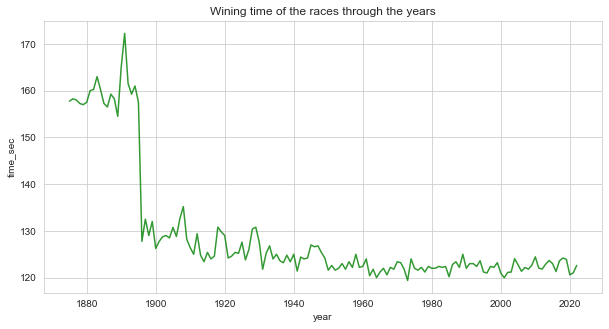

In [10]:
plt.figure(figsize=(10,5))
sns.lineplot(data=df, x='year', y='time_sec', color='green', alpha=0.8).set(title = 'Wining time of the races through the years')

**It can be noted that almost since 1990, the races have been 1.25 in its distance, therefore, it will be managed the data from that point.**

### 3.4 Considering just the "1.25" distance races

In [11]:
actual = df[df['distance'] == 1.25].sort_values('year').reset_index().drop('index', axis=1)
actual.head()

,year,winner,jockey,trainer,owner,distance,track_condition,time_sec
0,1896,Ben Brush,Willie Simms,Hardy Campbell Jr.,Mike F. Dwyer,1.25,Fast,127.75
1,1897,Typhoon II,Buttons Garner,Julius C. Cahn,Julius C. Cahn,1.25,Heavy,132.50
2,1898,Plaudit,Willie Simms,John E. Madden,John E. Madden,1.25,Good,129.00
3,1899,Manuel,Fred Taral,Robert J. Walden,A. H. & D. H. Morris,1.25,Fast,132.00
4,1900,Lieut. Gibson,Jimmy Boland,Charles H. Hughes,Charles Head Smith,1.25,Fast,126.25


### 3.4.1 Analysis of the race times distribution

[Text(0.5, 1.0, 'Box Plot of the race times distribution')]

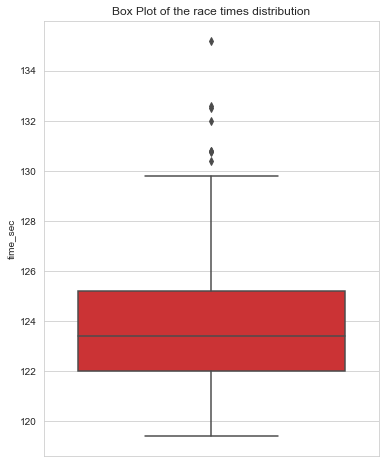

In [12]:
plt.figure(figsize=(6,8))
sns.boxplot(y='time_sec', data=actual, palette='Set1').set(title = 'Box Plot of the race times distribution')

In [13]:
actual['time_sec'].describe().round(1)

count    127.0
mean     124.1
std        3.1
min      119.4
25%      122.0
50%      123.4
75%      125.2
max      135.2
Name: time_sec, dtype: float64

### 3.4.2 Analysis of the number and time races regard the track conditions

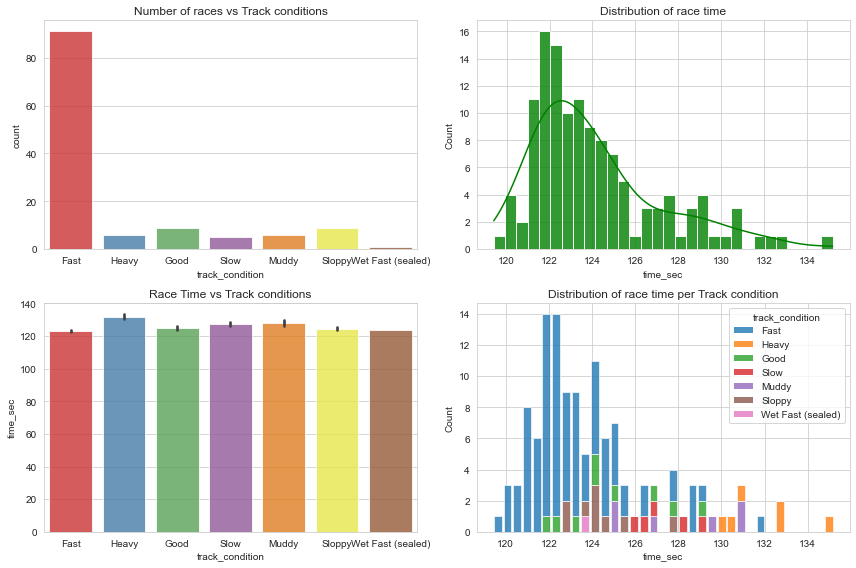

In [14]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,8))

# Number of races vs Track conditions
axes[0][0].set_title('Number of races vs Track conditions')
sns.countplot(ax=axes[0][0], data=actual, x='track_condition', palette='Set1', alpha=0.8)

# Race Time vs Track conditions
axes[1][0].set_title('Race Time vs Track conditions')
sns.barplot(ax=axes[1][0], data=actual, x='track_condition', y='time_sec', palette='Set1', alpha=0.8)

# Distribution of race time
axes[0][1].set_title('Distribution of race time')
sns.histplot(ax=axes[0][1], data=actual, x='time_sec', bins=30, alpha=0.8, kde=True, color='green')

# Distribution of race time per Track condition
axes[1][1].set_title('Distribution of race time per Track condition')
sns.histplot(ax=axes[1][1], data=actual, x='time_sec', bins=35, alpha=0.8, multiple="stack", shrink=.8, hue='track_condition')

plt.tight_layout()

### 3.5 "winner", "jockey", "trainer", and "owner" columns analysis

In [15]:
print(actual.groupby('winner')['year'].count().sort_values(), '\n')
print('Number of unique data:', actual['winner'].nunique())
print('Count of the members of the column:', actual['winner'].count())
print('Column size:', actual['winner'].size)

winner
Affirmed       1
Rich Strike    1
Reigh Count    1
Regret         1
Real Quiet     1
              ..
Donerail       1
Donau          1
Determine      1
Gallant Fox    1
Zev            1
Name: year, Length: 127, dtype: int64 

Number of unique data: 127
Count of the members of the column: 127
Column size: 127


In [16]:
data = actual.drop('winner', axis=1)

* Because the count of the unique values, the count of the members of the column, and the column size have the same value, we can assume that the name of every winning horse is different from each other and isn't repeated, therefore, that column will be despised for further considerations.

In [17]:
print(data.groupby('jockey')['year'].count().sort_values(ascending=False), '\n')
print('Number of unique data:', data['jockey'].nunique())
print('Count of the members of the column:', data['jockey'].count())
print('Column size:', data['jockey'].size)

jockey
Eddie Arcaro        5
Bill Hartack        5
Bill Shoemaker      4
Calvin Borel        3
Gary Stevens        3
                   ..
John McCabe         1
Charles Thompson    1
Johnny Longden      1
Johnny Sellers      1
Jean Cruguet        1
Name: year, Length: 86, dtype: int64 

Number of unique data: 86
Count of the members of the column: 127
Column size: 127


In [18]:
print(data.groupby('trainer')['year'].count().sort_values(ascending=False), '\n')
print('Number of unique data:', data['trainer'].nunique())
print('Count of the members of the column:', data['trainer'].count())
print('Column size:', data['trainer'].size)

trainer
Ben A. Jones           6
Bob Baffert            6
Herbert J. Thompson    4
D. Wayne Lukas         4
Jim Fitzsimmons        3
                      ..
Frank M. Taylor        1
Frank E. Childs        1
Frank D. Weir          1
Frank Catrone          1
Hugh L. Fontaine       1
Name: year, Length: 95, dtype: int64 

Number of unique data: 95
Count of the members of the column: 127
Column size: 127


In [19]:
print(data.groupby('owner')['year'].count().sort_values(ascending=False), '\n')
print('Number of unique data:', data['owner'].nunique())
print('Count of the members of the column:', data['owner'].count())
print('Column size:', data['owner'].size)

owner
Calumet Farm              8
Edward R. Bradley         4
Belair Stud               3
J. Paul Reddam            2
King Ranch                2
                         ..
Fred & Juliette Turner    1
Frank M. McMahon          1
Frank B. Van Meter        1
Frances A. Genter         1
Zayat Stables, LLC        1
Name: year, Length: 108, dtype: int64 

Number of unique data: 108
Count of the members of the column: 127
Column size: 127


* On the other hand, in the "jockey", "trainer" and "owner" columns, the count of the unique values, the count of the members of the column, and the sizes of the columns have different values, we can assume that sometimes the names in those columns are not different from each other and are repeated, therefore, that columns must be considered as features for predictions.

## 4. Data transforming

### 4.1 Assigning an number id to every jockey, trainer and owner

In [20]:
jockeys = np.sort(data['jockey'].unique(), axis=0)
index_jockeys = np.arange(1,len(jockeys)+1)
jockey_id = pd.DataFrame({'jockey_id':index_jockeys, 'jockey':jockeys})
jockey_id.head(10)

,jockey_id,jockey
0,1,Albert Johnson
1,2,Andy Minder
2,3,Arthur Pickens
3,4,Bill Hartack
4,5,Bill Shoemaker
5,6,Bobby Ussery
6,7,Braulio Baeza
7,8,Buttons Garner
8,9,Calvin Borel
9,10,Carroll Bierman


In [21]:
trainers = np.sort(data['trainer'].unique(), axis=0)
index_trainers = np.arange(1, len(trainers)+1)
trainer_id = pd.DataFrame({'trainer_id':index_trainers, 'trainer':trainers})
trainer_id.head(10)

,trainer_id,trainer
0,1,Albert Ewing
1,2,Art Sherman
2,3,Barclay Tagg
3,4,Ben A. Jones
4,5,Bennie L. Woolley Jr.
5,6,Bert S. Michell
6,7,Bill Mott
7,8,Bob Baffert
8,9,Bob Smith
9,10,Brad H. Cox


In [22]:
owners = np.sort(data['owner'].unique(), axis=0)
index_owners = np.arange(1, len(owners)+1)
owner_id = pd.DataFrame({'owner_id':index_owners, 'owner':owners})
owner_id.head(10)

,owner_id,owner
0,1,A. H. & D. H. Morris
1,2,Ada L. Rice
2,3,Andrew J. Crevolin
3,4,BCC Stable
4,5,Bashford Manor Stable
5,6,Belair Stud
6,7,Benjamin Block
7,8,Billings & Johnson
8,9,Bob & Beverly Lewis
9,10,Brookmeade Stable


### 4.2 Merging the numbers id's with the principal data frame

In [23]:
dfp = pd.merge(data, jockey_id, how='inner', on='jockey')
dfp = pd.merge(dfp, trainer_id, how='inner', on='trainer')
dfp = pd.merge(dfp, owner_id, how='inner', on='owner')
dfp[['jockey', 'jockey_id', 'trainer', 'trainer_id', 'owner', 'owner_id']].head(10)

,jockey,jockey_id,trainer,trainer_id,owner,owner_id
0,Willie Simms,85,Hardy Campbell Jr.,42,Mike F. Dwyer,78
1,Willie Simms,85,John E. Madden,58,John E. Madden,61
2,Buttons Garner,8,Julius C. Cahn,67,Julius C. Cahn,66
3,Fred Taral,31,Robert J. Walden,81,A. H. & D. H. Morris,1
4,Jimmy Boland,46,Charles H. Hughes,15,Charles Head Smith,15
5,Jimmy Winkfield,47,Frank B. Van Meter,30,Frank B. Van Meter,35
6,Jimmy Winkfield,47,Thomas C. McDowell,85,Thomas C. McDowell,99
7,Harold Booker,36,John P. Mayberry,61,Charles R. Ellison,16
8,Shorty Prior,72,Charles E. Durnell,14,Lasca Durnell,71
9,Jack Martin,42,Robert Tucker,82,Samuel S. Brown,92


In [24]:
dfp.head()

,year,jockey,trainer,owner,distance,track_condition,time_sec,jockey_id,trainer_id,owner_id
0,1896,Willie Simms,Hardy Campbell Jr.,Mike F. Dwyer,1.25,Fast,127.75,85,42,78
1,1898,Willie Simms,John E. Madden,John E. Madden,1.25,Good,129.00,85,58,61
2,1897,Buttons Garner,Julius C. Cahn,Julius C. Cahn,1.25,Heavy,132.50,8,67,66
3,1899,Fred Taral,Robert J. Walden,A. H. & D. H. Morris,1.25,Fast,132.00,31,81,1
4,1900,Jimmy Boland,Charles H. Hughes,Charles Head Smith,1.25,Fast,126.25,46,15,15


* In this point we already have the names of the jockeys, trainers and owners related with a specific id number, so it is not need the logged names anymore for further steps.

In [25]:
derby = dfp.drop(['distance', 'year', 'jockey', 'trainer', 'owner'], axis=1)[['jockey_id', 'trainer_id', 'owner_id', 'track_condition', 'time_sec']]
derby.head()

,jockey_id,trainer_id,owner_id,track_condition,time_sec
0,85,42,78,Fast,127.75
1,85,58,61,Good,129.00
2,8,67,66,Heavy,132.50
3,31,81,1,Fast,132.00
4,46,15,15,Fast,126.25


### 4.3 Converting the track conditions to a numeric class 

In [26]:
tracks = {'Fast': 1, 'Good': 2, 'Heavy': 3, 'Muddy': 4, 'Sloppy': 5, 'Slow': 6, 'Wet Fast (sealed)': 7}
derby['track_condition'] = derby['track_condition'].map(tracks)
derby.head()

,jockey_id,trainer_id,owner_id,track_condition,time_sec
0,85,42,78,1,127.75
1,85,58,61,2,129.00
2,8,67,66,3,132.50
3,31,81,1,1,132.00
4,46,15,15,1,126.25


### 4.4 Creation of the target times

* In this step, the races time in seconds will be transformed to a numeric classes based on the quartiles of the races time distribution.
* These classes are going to be the target classes to predict in the model, making the model able to predict if a horse would perform a great race time or not.
* Being 1 a "great" race time and 4 a "bad" race.

In [27]:
a = []

for i in derby['time_sec']:
    if i <= np.quantile(derby['time_sec'], 0.25):
        i = 1
    elif (i > np.quantile(derby['time_sec'], 0.25)) & (i <= np.median(derby['time_sec'])):
        i = 2
    elif (i > np.median(derby['time_sec'])) & (i <= np.quantile(derby['time_sec'], 0.75)):
        i = 3
    else:
        i = 4

    a.append(i)
    
derby['target_times'] = a
derby.head()

,jockey_id,trainer_id,owner_id,track_condition,time_sec,target_times
0,85,42,78,1,127.75,4
1,85,58,61,2,129.00,4
2,8,67,66,3,132.50,4
3,31,81,1,1,132.00,4
4,46,15,15,1,126.25,4


In [28]:
derby = derby.drop('time_sec', axis=1)
derby.head()

,jockey_id,trainer_id,owner_id,track_condition,target_times
0,85,42,78,1,4
1,85,58,61,2,4
2,8,67,66,3,4
3,31,81,1,1,4
4,46,15,15,1,4


* At this point, it is already have the data ready to create and fit a model, to perform the wanted predictions later, but let's see a little more data visualization with these new transformed columns.

[Text(0.5, 1.0, 'Correlation between columns')]

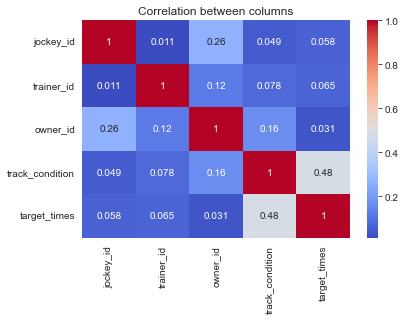

In [78]:
corr = derby.corr()
sns.heatmap(corr, cmap='coolwarm', annot=True).set(title = 'Correlation between columns')

[Text(0.5, 1.0, 'Team Member Mapping')]

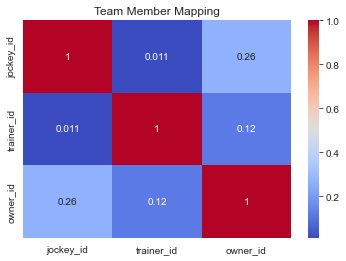

In [79]:
teams = derby[['jockey_id', 'trainer_id', 'owner_id']].corr()
sns.heatmap(teams, cmap='coolwarm', annot=True).set(title = 'Team Member Mapping')

[Text(0.5, 1.0, 'Times distribution between quartiles')]

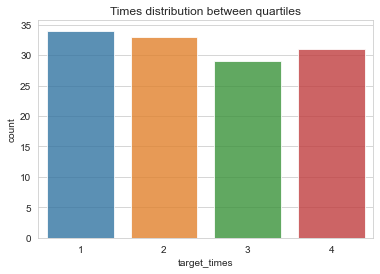

In [82]:
sns.countplot(data=derby, x='target_times', alpha=0.8).set(title = 'Times distribution between quartiles')

## 5. Building model

* Now it's time to create a model, for this case, due to the features of the target classes, it will be used a K-Nearest Neighbors model.
* Then, in this same section, the model will be adjusted in its number of neighbors through the "Elbow method".
* Finally, it will be measured the model improvement regard the adjustment.

### 5.1 Standardized of the data

In [29]:
scaler = SS()
scaler.fit(derby.drop('target_times', axis=1))
scaled_features = scaler.transform(derby.drop('target_times', axis=1))

### 5.2 Data splitting

In [30]:
x = scaled_features
y = derby['target_times']

x_train, x_test, y_train, y_test = tts(x, y, test_size=0.33, random_state=101)

### 5.3 Training a K-Nearest Neighbors model

In [87]:
a = n_neighbors = 1
knn_1 = KNC(a)
knn_1.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=1)

### 5.4 Making predictions

In [88]:
pred_1 = knn_1.predict(x_test)

### 5.5 Getting metrics with just 1 neighbor

In [90]:
print(f'Number of neighbors = {a}')
print(cm(y_test, pred_1))
print(cr(y_test, pred_1))

Number of neighbors = 1
[[5 1 3 1]
 [5 3 2 5]
 [3 0 1 3]
 [2 2 1 5]]
              precision    recall  f1-score   support

           1       0.33      0.50      0.40        10
           2       0.50      0.20      0.29        15
           3       0.14      0.14      0.14         7
           4       0.36      0.50      0.42        10

    accuracy                           0.33        42
   macro avg       0.33      0.34      0.31        42
weighted avg       0.37      0.33      0.32        42



### 5.6 Searching for the best number of neighbors with the "Elbow method"

Text(0, 0.5, 'Error Rate')

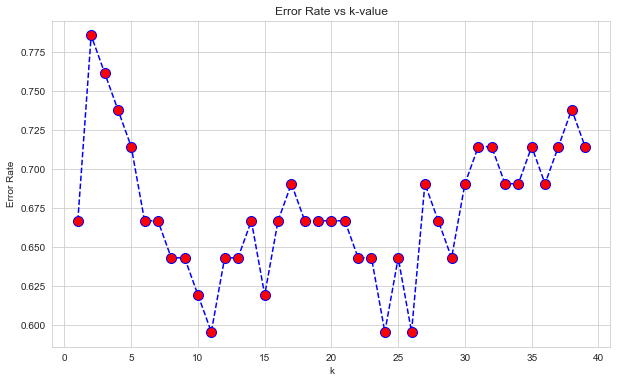

In [34]:
error_rate = []
for i in range(1,40):
    knn = KNC(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    
    error_rate.append(np.mean(pred_i != y_test))
    
    
plt.figure(figsize=(10,6))
plt.plot(range(1,40), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs k-value')
plt.xlabel('k')
plt.ylabel('Error Rate')

### 5.7 Getting metrics with just 24 neighbor

In [109]:
# It is selected 24 neighbors as one of the stabilized values under an error rate of 0.650, leading to the best scores.
b = n_neighbors = 24
knn_2 = KNC(b)
knn_2.fit(x_train, y_train)
pred_2 = knn_2.predict(x_test)

print(f'Number of neighbors = {b}')
print(cm(y_test, pred_2))
print(cr(y_test, pred_2))

Number of neighbors = 24
[[4 5 1 0]
 [6 7 0 2]
 [4 0 2 1]
 [6 0 0 4]]
              precision    recall  f1-score   support

           1       0.20      0.40      0.27        10
           2       0.58      0.47      0.52        15
           3       0.67      0.29      0.40         7
           4       0.57      0.40      0.47        10

    accuracy                           0.40        42
   macro avg       0.51      0.39      0.41        42
weighted avg       0.50      0.40      0.43        42



### 5.8 Percentage of improvement in the model

In [108]:
dif_accuracy = round(100*abs(accuracy_score(y_test, pred_1)-accuracy_score(y_test, pred_2)), 2)
dif_precision = round(100*abs(precision_score(y_test, pred_1, average='weighted')-precision_score(y_test, pred_2, average='weighted')), 2)
dif_recall = round(100*abs(recall_score(y_test, pred_1, average='weighted')-recall_score(y_test, pred_2, average='weighted')), 2)
dif_f1_score = round(100*abs(f1_score(y_test, pred_1, average='weighted')-f1_score(y_test, pred_2, average='weighted')), 2)

print(f'Accuracy improvement: {dif_accuracy}%')
print(f'Precision improvement: {dif_precision}%')
print(f'Recall improvement: {dif_recall}%')
print(f'F1-Score improvement: {dif_f1_score}%')

Accuracy improvement: 7.14%
Precision improvement: 13.63%
Recall improvement: 7.14%
F1-Score improvement: 10.71%


## 6. Conclusions

* Due to the size of the samples in the data splitting, it is that the metrics are considerably penalized in their results, however, it could give a good first approach to predictions of whether a horse has a good race time or not, regarding the circumstances in each case.
* Better analysis and predictions could be made if there were more data per year that demonstrated a higher correlation between the characteristics of the data, as well as more parameters to consider, such as horse weights and sizes.
* Despite the data cut of the races of 1.5 in distance, this model could be improved and updated in its parameters, progressively feeding it with new data over time.